Bolded text = **do not change**

Italics text = *replace with your own words*


******************
*******************

# **Description of data**

*Describe your dataset and what you want to analyze*
 


The dataset"StudentsPerformance.csv" tells us about student testing performance in reading, writing and math test. Some predicting variables for student's learning outcome are included as categorical variables in the data set: ethnicity, gender, lunch/not lunch, class/no class, and parent educational backgroup.

I'm specifically interested in answering two question using this dataset:

1. does parental level of education predict difference in exam scores?

2. does lunch affect exam scores?

And a possible third question:

3. does "test preparation course"+"parent level of edication" together predict(explain) student testing outcome(Math, reading and writing).


*******************
*******************
# **Libraries**

In [5]:
import pandas as pd
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

*******************
*******************
# **Functions used in notebook**

*If you write a function to help with any of your sections, please put that function here*

In [ ]:
# Functions that you develop

*******************
*******************
# **Getting data**

*Provide Pseudocode*

In [74]:
# Code for acquiring data
files.upload()
df= pd.read_csv('StudentsPerformance.csv')

In [60]:
# Display first 5 rows of data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# Display last 5 rows of data
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [64]:
# Show data.info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [63]:
# Show data.describe
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


***************
***************
# **Visualizing data**

*Provide relevant pseudocode*

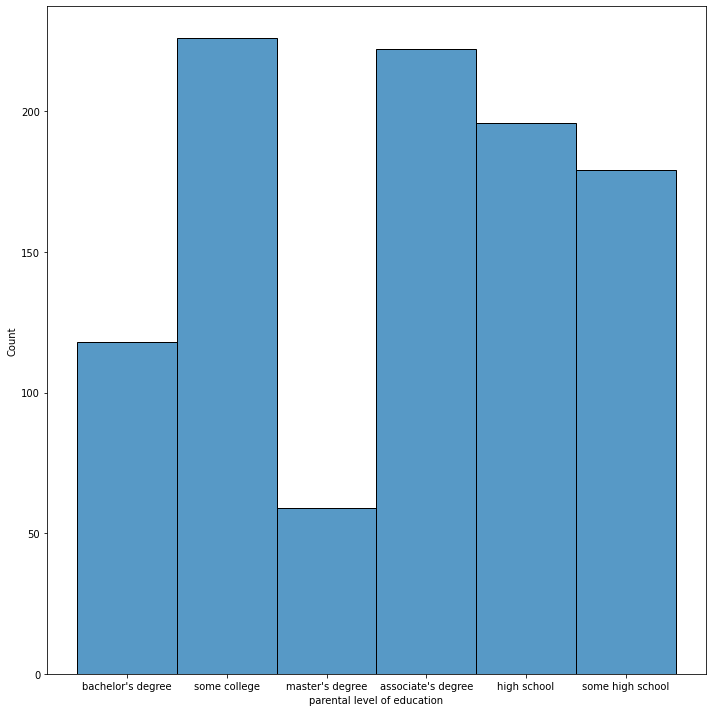

In [30]:
# visualization 1
# A Histogram on Parents education leve
fig=plt.figure(figsize=(10,10))
sns.histplot(df["parental level of education"])
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


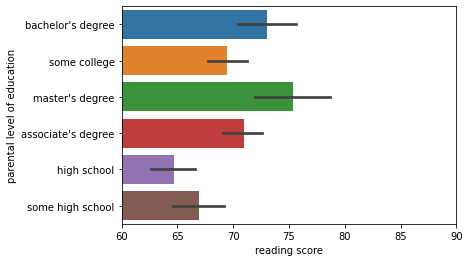

In [16]:
# visualization 2
#A Bar Graph on Parents education level on student's performance on reading test
sns.barplot(df["reading score"], df["parental level of education"]).set_xlim(60,90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


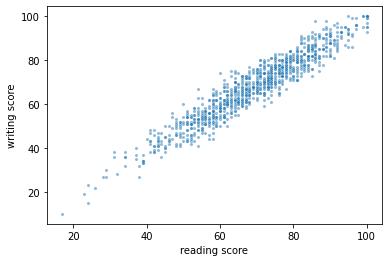

In [35]:
# visualization 3
sns.scatterplot(df['reading score'],df['writing score'], alpha=0.5, s=10)
plt.show()

In [ ]:
# visualization 4

In [ ]:
# visualization 5

In [ ]:
# visualization 6

***************
***************
# **Feature Engineering**

*If making specific choices (e.g., binning data, dummy coding, etc), please describe what you plan to do here*


Planning on doing dummy coding for

  1.parental level of education

  2.lunch

  3.test preparation course

.*Extra if necessory" binning math, reading and testing score into three groups(high,medium and low) for convinient Multivariate regression analysis.

Might also do ethnicity if necessory

The purpose of this project is to examine two question

1. does parental level of education predict difference in exam scores?

2. does lunch affect exam scores?

Inorder to exame this two question, I will create to new columns:

1. A "total score" column that sums up the three test scores.

2. A "reading/writing ratio" column that devide writing score by reading score(To distringuish math test and english test, lunch might have different effect in logical thinking/reading).



I believe we haven't learn multivariate linear regression with multiple predicting variables. But if it's possible, I want to also look at does "test preparation course"+"parent level of edication" together predict(explain) student testing outcome(Math, reading and writing).




*Provide relevant pseudocode*


In [7]:
# Check and take care of null values
df.info()
#no null values were found in the dataframe

# Check and take care of duplicates values
print(df[df.duplicated(keep=False)])

#no duplicates were found in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
Empty DataFrame
Columns: [gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score]
Index: []


No null values and duplicates values were found in the dataframe

In [ ]:
# Check and take care of string values



Nothing needs to be take care of for string values at this point


In [75]:
# Check and take care of outliers
# We remove all the values that is higher than upper limits(calculate by mean of that facotor + 2 standard deviation) and lower than lower limite(calculate by mean of that facoor - 2 standard deviation)
# The outliers above 3 standard deviations were removed
#For reading score
df= df[(df["reading score"] < (df["reading score"].mean()+3*df["reading score"].std())) & (df["reading score"] > (df["reading score"].mean()-3*df["reading score"].std()))]
#For writing score
df = df[(df['writing score'] < (df['writing score'].mean()+3*df['writing score'].std())) & (df['writing score'] > (df['writing score'].mean()-3*df['writing score'].std()))]
#For math score
df= df[(df['math score'] < (df['math score'].mean()+3*df['math score'].std())) & (df['math score'] > (df['math score'].mean()-3*df['math score'].std()))]

In [76]:

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 993 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       993 non-null    object
 1   race/ethnicity               993 non-null    object
 2   parental level of education  993 non-null    object
 3   lunch                        993 non-null    object
 4   test preparation course      993 non-null    object
 5   math score                   993 non-null    int64 
 6   reading score                993 non-null    int64 
 7   writing score                993 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 69.8+ KB


7 outliers has been removed(has a math,reading,writing score 3 or more standard deviation away from the mean).

In [1]:
# Any additional feature engineering

***************
***************
# **Analysis section**

I'm going to do analysi on multivariate linear regression of

1. total score ~ parent level of education

2. total score ~ lunch

3. total score ~ test preparation + parent level of education

I will address multicolinearity problems, heteroskedasticity problems, non linearity(I don't think this is likely due to the visualizations made previously), and  variable bias problems. Be aware of possibilities of overfit!

I'm going to compare the R^2 values. We will use OLS to obtain the T test value and p value.  If I'm doing the third question, I might need to also do an anova analysis of the model since it will be become a 2*6 factorial design.

It would be great if you could please provide some feedback on how to implement two variable linear regression!

Sincerely,
Siyuan


*Provide relevant pseudocode for linear regression or classification*

In [ ]:
# Machine Learning 1

In [ ]:
# Machine Learning 2, if needed

***************
***************
# **Conclusions**

*Describe what you found and learned from your evaluation of your dataset*